In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
%matplotlib inline

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/dataset/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv"
data = pd.read_csv(path)

# IBM Marketing customer value data

#1 Introduction

##1.1. About Dataset and Goal

**Context**


Using Watson Analytics, predict behavior to retain your customers. Analyze all relevant customer data and develop focused customer retention programs.

**Inspiration**


Understand customer demographics and buying behavior. Use predictive analytics to analyze the most profitable customers and how they interact. Take targeted actions to increase profitable customer response, retention, and growth.


**Goal**


- Predicting behavior to retain customers.
- Analyzing all relevant customer data and develop focused customer retention programs to understand customer demographics and buying behavior.
- Using predictive analytics to analyze the most profitable customers and how they interact.
- Taking targeted actions to increase profitable customer response, retention, and growth.


**Source**


https://www.ibm.com/communities/analytics/watson-analytics-blog/marketing-customer-value-analysis/

##1.2 Dataset Overview

In [4]:
data.shape

(9134, 24)

This data consists of 9134 rows and 24 columns

In [5]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


It displays the first 5 rows of the DataFrame, along with their associated column values.
It helps quickly check the structure of the data, the column names, and the initial data points to get an initial understanding of the dataset.

##1.3 EDA (Exploratory Data Analysis)

In a nutshell, EDA helps get familiar with data, clean it up, and uncover valuable insights that can guide future actions or analysis.

It's the first step in the data analysis journey and a critical one, just like studying a map before embarking on a treasure hunt.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

It provides an overview of the DataFrame, including:

- Data Type: It shows the data type of each column in your dataset. For example, it will tell you if a column contains numbers (integers or floats), text (strings), or dates (datetime).

- Non-Null Count: It tells you how many non-null (non-missing) values are present in each column. This helps you understand if there are missing values in your data.

- Memory Usage: It shows how much memory your dataset is using, which can be useful for assessing the memory footprint of your data.

- Total Columns: It displays the total number of columns in your dataset.

- Total Rows: It displays the total number of rows or data points in your dataset.

In [7]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

This information can be very useful for identifying columns with missing data and deciding how to handle those missing values, whether it's through imputation, deletion, or other data cleaning techniques.


This is excellent news because having no missing values simplifies your data analysis and ensures that you can work with the complete dataset without the need for data imputation or handling missing data. It's a good starting point for any data analysis or modeling task.

###1.3.1 Univariate Analysis of Categorical Data

In [8]:
categorical_var=['State', 'Response', 'Coverage',
       'Education', 'EmploymentStatus', 'Gender',
       'Marital Status', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size']

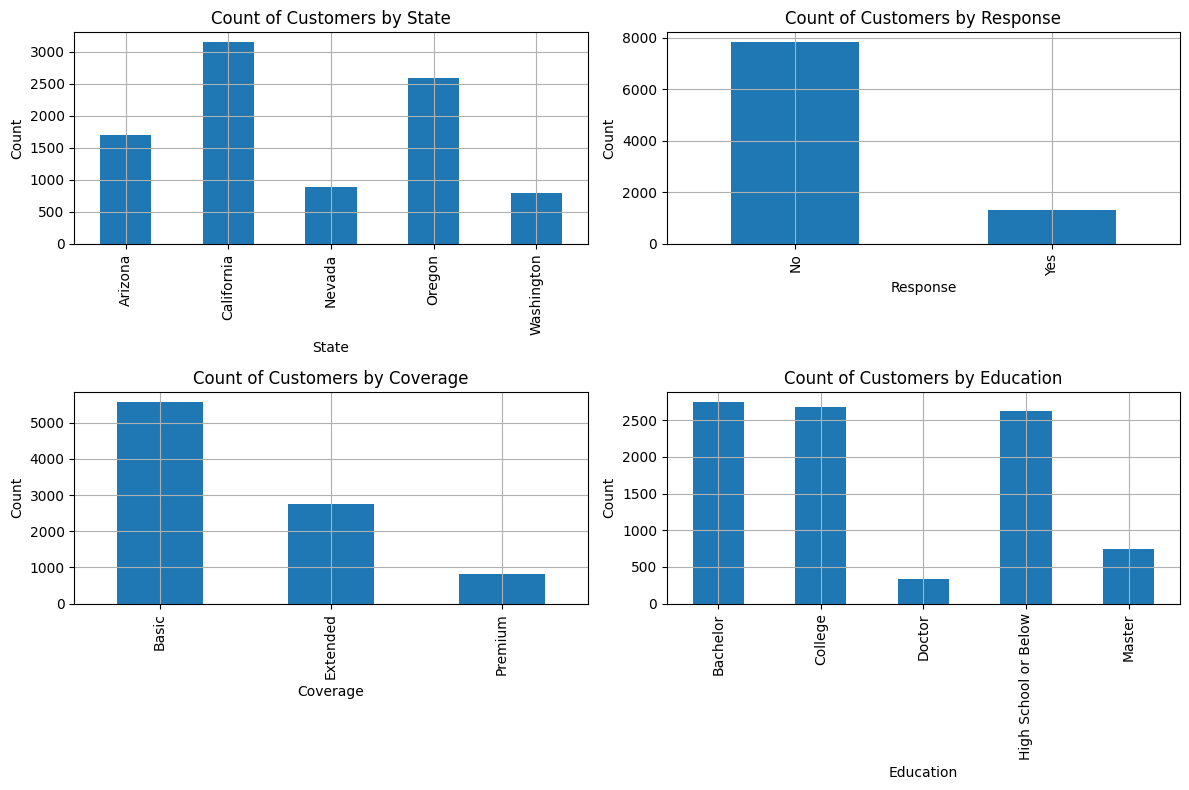

In [9]:
def side_by_side_plot(data, categorical_var):
    num_cols = len(categorical_var)
    num_rows = math.ceil(num_cols / 2)  # Calculate the number of rows needed for 2 columns

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

    for i, var in enumerate(categorical_var):
        row = i // 2  # Calculate the row number
        col = i % 2   # Calculate the column number
        ax = axes[row, col]  # Get the appropriate subplot

        data.groupby(var)['Customer'].count().plot(kind='bar', grid=True, ax=ax)
        ax.set_ylabel('Count')
        ax.set_xlabel(var)
        ax.set_title(f'Count of Customers by {var}')

    # Remove any empty subplots if the number of plots is odd
    if num_cols % 2 != 0:
        fig.delaxes(axes[row, col + 1])

    plt.tight_layout()
    plt.show()

# Usage:
categorical_var = ['State', 'Response', 'Coverage', 'Education']  # Replace with your categorical variables
side_by_side_plot(data, categorical_var)

The modified code defines a function, side_by_side_plot, which takes a DataFrame (data) and a list of categorical variables (categorical_var).

It dynamically calculates the number of rows required for two columns of plots. Then, it iterates through the categorical variables, creating side-by-side bar plots for each one. The layout is organized into two columns, and if the number of plots is odd, it removes an empty subplot. Finally, it ensures proper spacing and displays the plots, providing a clear visualization of the categorical data.

In [10]:
categorical_var.remove('Response')
categorical_var

['State', 'Coverage', 'Education']

###1.3.2 Univariate Analysis of Numerical Data

In [11]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


The `data.describe()` code provides a summary statistical analysis of the numerical columns in your DataFrame (assuming `data` is a Pandas DataFrame). The output includes key statistics for each numerical column, such as:

- Count: The number of non-null values in each column.
- Mean: The average value of the data in each column.
- Std: The standard deviation, which measures the spread or dispersion of the data.
- Min: The minimum value in the column.
- 25%: The 25th percentile value, which is the value below which 25% of the data falls.
- 50%: The median or 50th percentile value, which represents the middle value of the data.
- 75%: The 75th percentile value, which is the value below which 75% of the data falls.
- Max: The maximum value in the column.

This summary is helpful for gaining insights into the central tendency, spread, and distribution of your numerical data, providing a quick overview of its characteristics.

<ipython-input-12-9a8ce044a9cd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


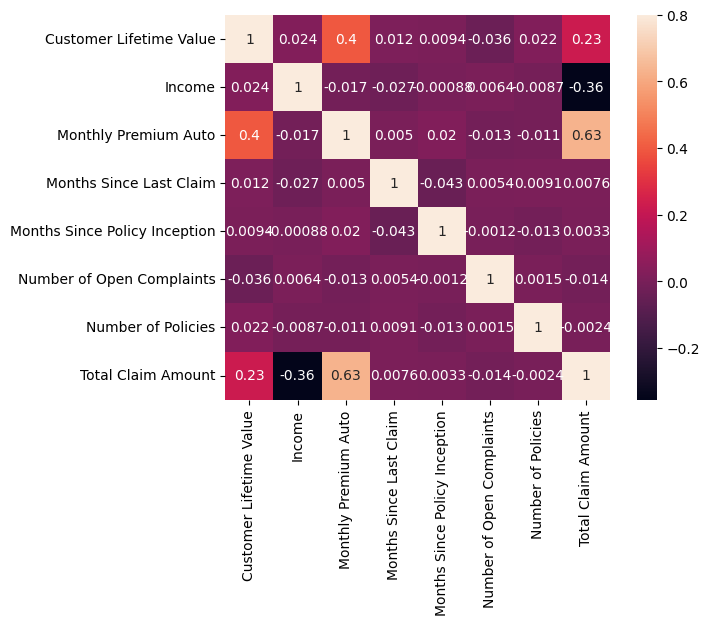

In [12]:
# Assuming 'data' contains your dataset
corrmat = data.corr()
fig = plt.figure(figsize=(7, 5))

sns.heatmap(corrmat, vmax=0.8, square=True, annot=True)
plt.show()

It gives insights into the relationships between numerical features in your dataset as it has higher corelation monthly premium auto is helpful to predict CLV

In [13]:
num_list=['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']
num_list

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [14]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


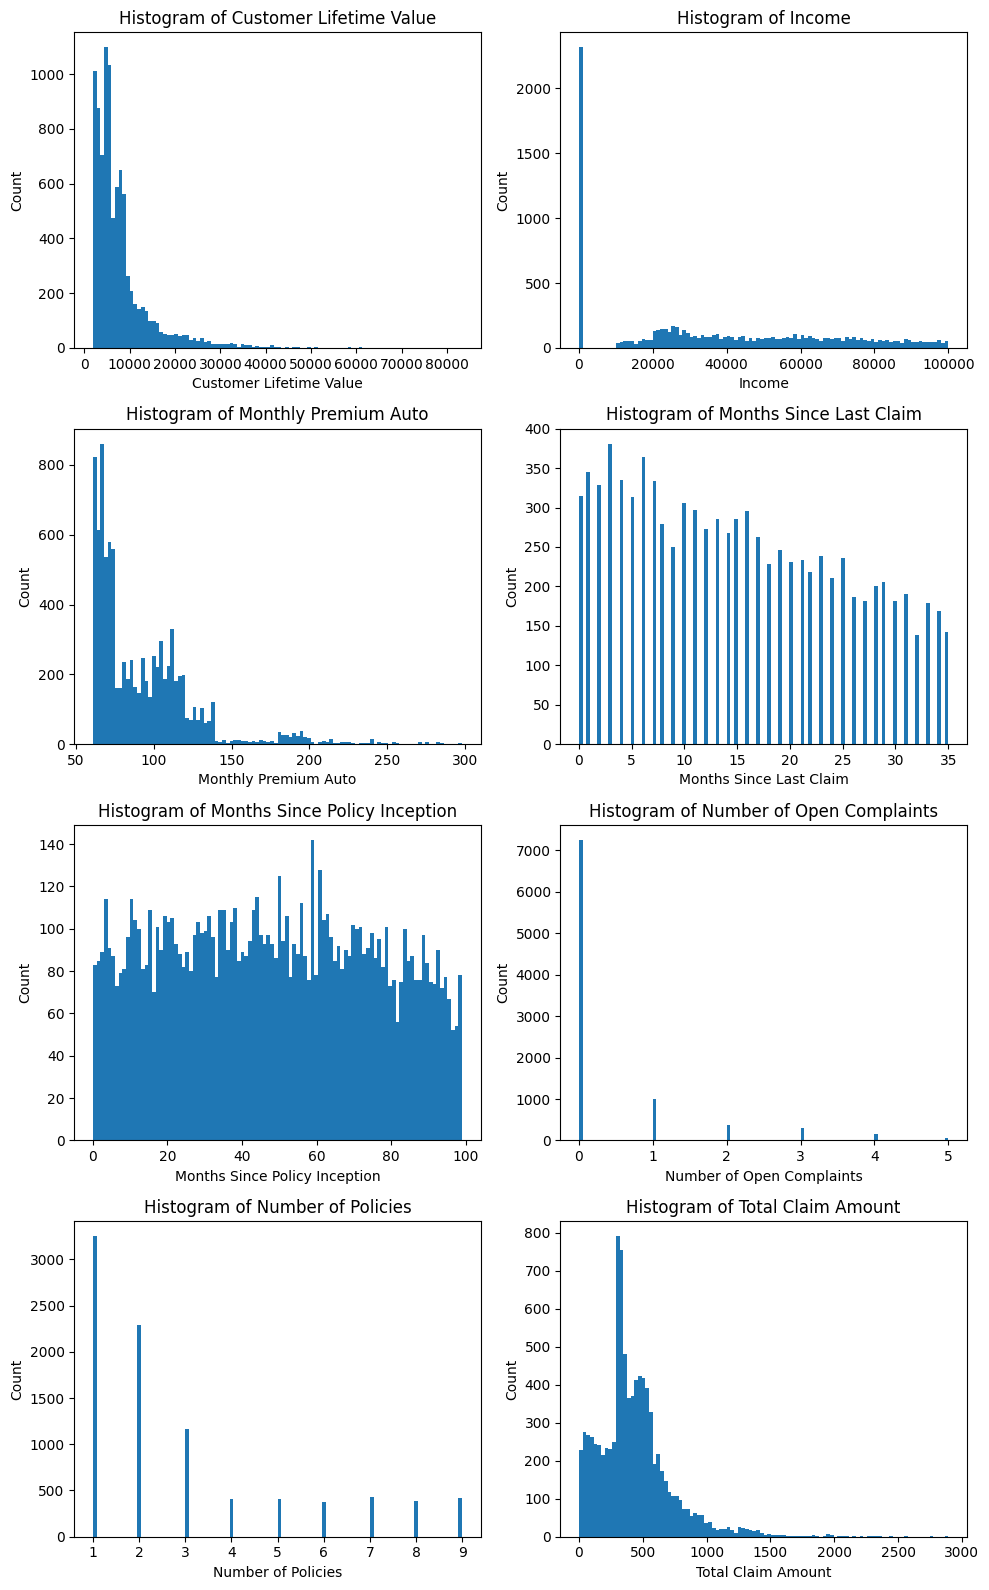

In [15]:
# Calculate the number of plots and rows
num_plots = len(num_list)
num_rows = math.ceil(num_plots / 2)

# Create subplots with two columns
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 4 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.ravel()

# Loop through numerical columns and create histograms
for i, feature in enumerate(num_list):
    axes[i].hist(data[feature], bins=100)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Histogram of {feature}')

# Remove any empty subplots if the number of plots is odd
if num_plots % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#2 Modeling

##2.1 Linear Regression

### 2.1.1 Linear Regression (Original Outcome)

**◾️ For the Prediction of Customer Lifetime Value**

In [16]:
X = data['Monthly Premium Auto'].values.reshape(-1,1)
y = data['Customer Lifetime Value'].values.reshape(-1,1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[432.67220054]
[[81.74976994]]


In [20]:
y_pred = regressor.predict(X_test)

In [21]:
data_ = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
data_

,Actual,Predicted
0,5592.455266,6155.156097
1,2317.282049,5991.656557
2,9540.923395,10160.894824
3,8581.278701,19970.867217
4,4229.923123,10733.143214
...,...,...
1822,8343.751519,6236.905867
1823,8828.933996,9425.146894
1824,4016.541995,9506.896664
1825,5159.369746,6482.155176


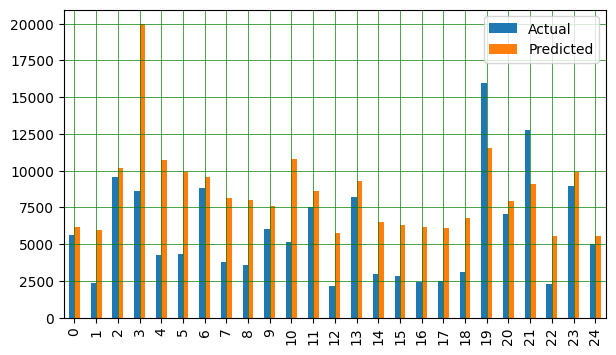

In [22]:
df1 = data_.head(25)
df1.plot(kind='bar',figsize=(7,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

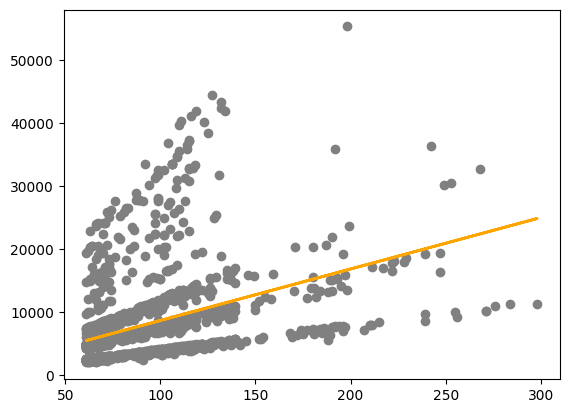

In [23]:
plt.scatter(X_test, y_test,  color='grey')
plt.plot(X_test, y_pred, color='orange', linewidth=2)
plt.show()

In [24]:
# Assuming you have defined 'y_test' and 'y_pred' elsewhere in your code
rmse_original_all = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse_original_all)

Root Mean Squared Error: 6123.717820331538


**◾️ Linear regression diagnostic plot - residuals vs fitted plot**

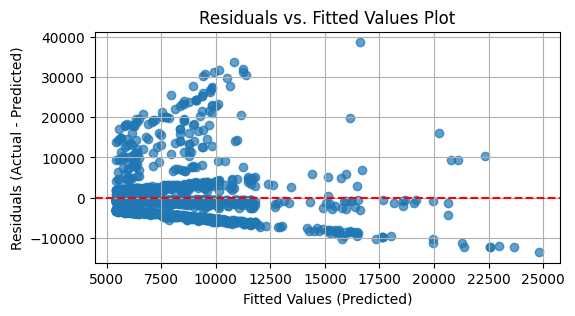

In [25]:
# Generate some sample data for demonstration
y = regressor.intercept_ + regressor.coef_ * X_train

# Calculate residuals
residuals = data_["Actual"] - data_["Predicted"]

# Create the Residual vs. Fitted plot
plt.figure(figsize=(6, 3))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs. Fitted Values Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

**Summary**


The residuals appear to be centered around zero; however, as the fitted values increase, the variances also seem to expand.

This suggests a potential violation of the assumption of homoscedasticity (equal variances).

**◾️ Linear regression diagnostic plot - normal q-q plot**

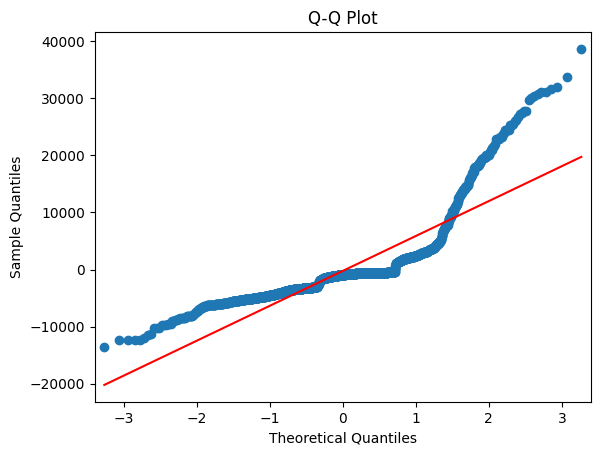

In [26]:
# Create a Q-Q plot
sm.qqplot(residuals, line='s')  # 's' for standard line
plt.title('Q-Q Plot')
plt.show()

**Summary**


Based on the QQ plot, the sample quantiles on the y-axis exhibit a hyperbolic increase, indicating a clear violation of the normality assumption.

###2.1.2 Linear Regression (Log transformed outcome)

In [27]:
# Log transformation for y (Customer Lifetime Value)
X = data['Monthly Premium Auto'].values.reshape(-1, 1)
y = np.log(data['Customer Lifetime Value'].values.reshape(-1, 1))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[7.95727334]
[[0.00852157]]


In [31]:
y_pred = regressor.predict(X_test)

In [32]:
data_ = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
data_

,Actual,Predicted
0,8.629174,8.553783
1,7.748150,8.536740
2,9.163346,8.971340
3,9.057338,9.993929
4,8.349939,9.030991
...,...,...
1822,9.029268,8.562305
1823,9.085790,8.894646
1824,8.298177,8.903168
1825,8.548570,8.587870


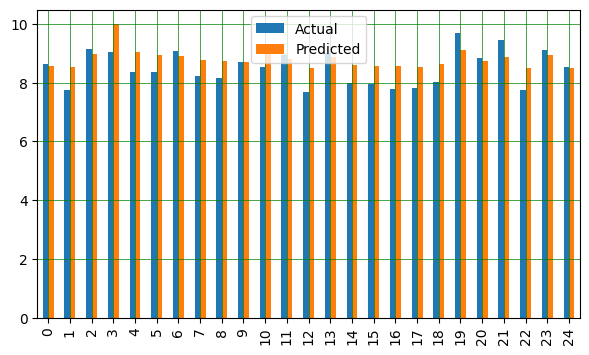

In [33]:
df1 = data_.head(25)
df1.plot(kind='bar',figsize=(7,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

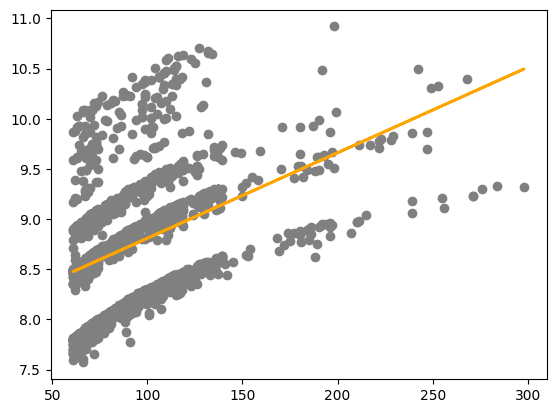

In [34]:
plt.scatter(X_test, y_test,  color='grey')
plt.plot(X_test, y_pred, color='orange', linewidth=2)
plt.show()

In [35]:
import numpy as np
from sklearn import metrics

# Assuming you have defined 'y_test' and 'y_pred' elsewhere in your code
rmse_log_all = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse_log_all)

Root Mean Squared Error: 0.5781142626140165


**◾️ Linear regression diagnostic plot - residuals vs fitted plot**

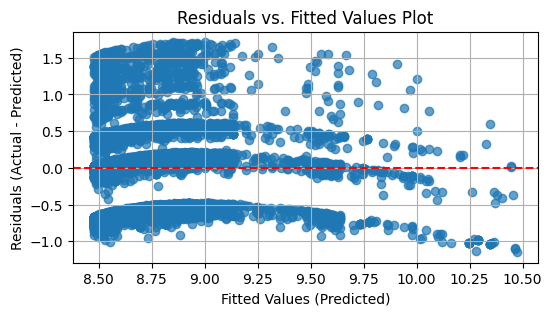

In [36]:
# Assuming 'data' is your DataFrame, replace it with your actual data
# Log transformation for y (Customer Lifetime Value)
X = data['Monthly Premium Auto'].values.reshape(-1, 1)
y = np.log(data['Customer Lifetime Value'].values.reshape(-1, 1))

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the values
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Create the Residual vs. Fitted plot
plt.figure(figsize=(6, 3))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs. Fitted Values Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()


**Summary**

The residuals plot displays a distinct pattern and does not center around zero, indicating a violation of the equal variance assumption.


Thus, this model fit is not acceptable.

**◾️ Linear regression diagnostic plot - normal q-q plot**

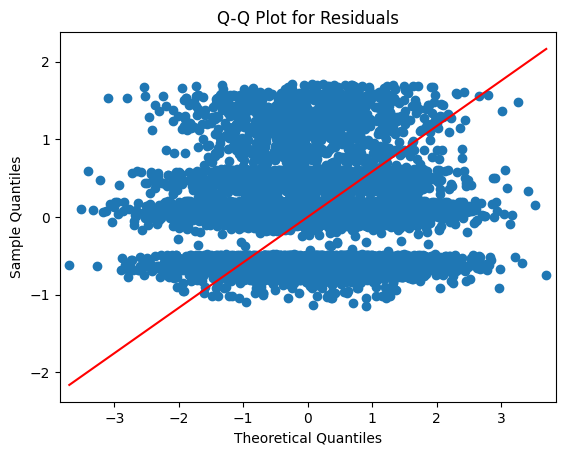

In [37]:
# Calculate residuals
residuals = y - y_pred

# Create a Q-Q plot for residuals
sm.qqplot(residuals, line='s')  # 's' for standard line
plt.title('Q-Q Plot for Residuals')
plt.show()

**Summary**

Data points are widely distributed along the diagonal line, this indicates that the data does not follow normal distribution.

### 2.1.3 Linear Regression (Square root)

In [38]:
# Square root transformation for X and y
X = data['Monthly Premium Auto'].values.reshape(-1, 1)
y = np.sqrt(data['Customer Lifetime Value'].values.reshape(-1, 1))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[47.64167399]
[[0.39217777]]


In [42]:
y_pred = regressor.predict(X_test)

In [43]:
data_ = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
data_

,Actual,Predicted
0,74.782720,75.094118
1,48.138156,74.309762
2,97.677650,94.310828
3,92.635191,141.372160
4,65.037859,97.056073
...,...,...
1822,91.344138,75.486295
1823,93.962407,90.781228
1824,63.376194,91.173406
1825,71.828753,76.662829


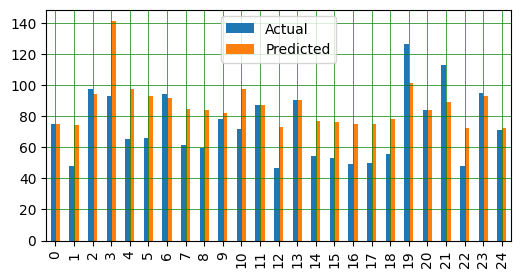

In [44]:
df1 = data_.head(25)
df1.plot(kind='bar',figsize=(6,3))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

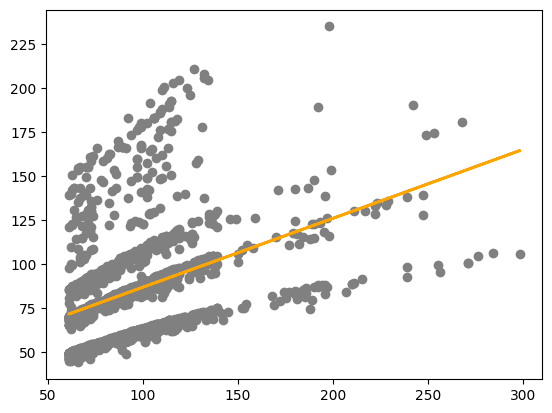

In [45]:
plt.scatter(X_test, y_test,  color='grey')
plt.plot(X_test, y_pred, color='orange', linewidth=2)
plt.show()

In [46]:
# Assuming you have defined 'y_test' and 'y_pred' elsewhere in your code
rmse_sqrt_all = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse_sqrt_all)

Root Mean Squared Error: 27.47460760599568


Linear regression diagnostic plot - residuals vs fitted plot

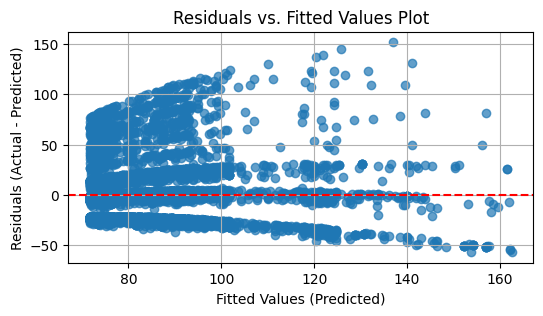

In [47]:
# Assuming 'data' is your DataFrame, replace it with your actual data
# Square root transformation for y (Customer Lifetime Value)
X = data['Monthly Premium Auto'].values.reshape(-1, 1)
y = np.sqrt(data['Customer Lifetime Value'].values.reshape(-1, 1))

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the values
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Create the Residual vs. Fitted plot
plt.figure(figsize=(6, 3))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs. Fitted Values Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()


**Summary**


The residuals plot displays a distinct pattern and does not center around zero, indicating a violation of the equal variance assumption.


Thus, this model fit is not acceptable.

**◾️ Linear regression diagnostic plot - normal q-q plot**

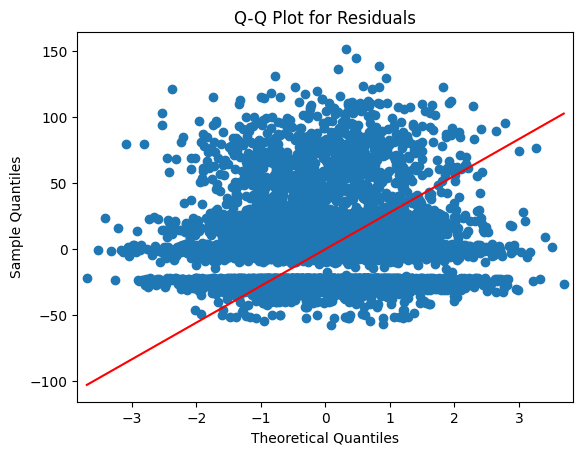

In [48]:
# Assuming 'data' is your DataFrame, replace it with your actual data
# Square root transformation for y (Customer Lifetime Value)
X = data['Monthly Premium Auto'].values.reshape(-1, 1)
y = np.sqrt(data['Customer Lifetime Value'].values.reshape(-1, 1))

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the values
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Create a Q-Q plot for residuals
sm.qqplot(residuals, line='s')  # 's' for standard line
plt.title('Q-Q Plot for Residuals')
plt.show()


**Summary**


Data points are widely distributed in a bell shape, it suggests a skewed or non-symmetric distribution.


This indicates that the data may not follow the normal distribution but instead follows a different distribution.

## 2.2 Machine Learning

### 2.2.1 Random Forest Regression

In [49]:
# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
# You can adjust n_estimators as needed

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions
y_rf_pred = rf_regressor.predict(X_test)

# Calculate RMSE
mse_rf = mean_squared_error(y_test, y_rf_pred)
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest RMSE: {rmse_rf}")

<ipython-input-49-5cfbdfb0c739>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


Random Forest RMSE: 27.0385560345827


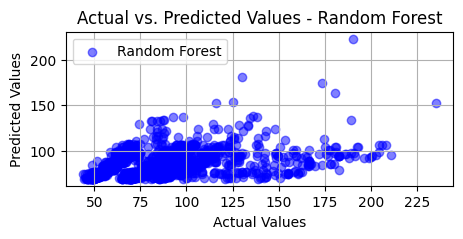

In [50]:
# Create scatter plot for Random Forest
plt.figure(figsize=(5, 2))
plt.scatter(y_test, y_rf_pred, c='blue', label='Random Forest', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - Random Forest')
plt.legend()
plt.grid(True)
plt.show()

**Summary**

The data points are close to the diagonal line. This indicates lower prediction errors.

### 2.2.2 Gradiant Boosting Regression

In [51]:
# Create a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
# You can adjust n_estimators and learning_rate as needed

# Fit the model to the training data
gb_regressor.fit(X_train, y_train)

# Make predictions
y_gb_pred = gb_regressor.predict(X_test)

# Calculate RMSE
mse_gb = mean_squared_error(y_test, y_gb_pred)
rmse_gb = np.sqrt(mse_gb)

print(f"Gradient Boosting RMSE: {rmse_gb}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting RMSE: 27.07845050366416


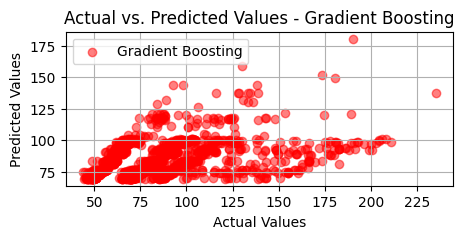

In [52]:
plt.figure(figsize=(5, 2))
plt.scatter(y_test, y_gb_pred, c='red', label='Gradient Boosting', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - Gradient Boosting')
plt.legend()
plt.grid(True)
plt.show()

**Summary**

The data points are close to the diagonal line. This indicates lower prediction errors.

# 3 Model Performance Evaluation

### 3.1 Barplot Evaluation

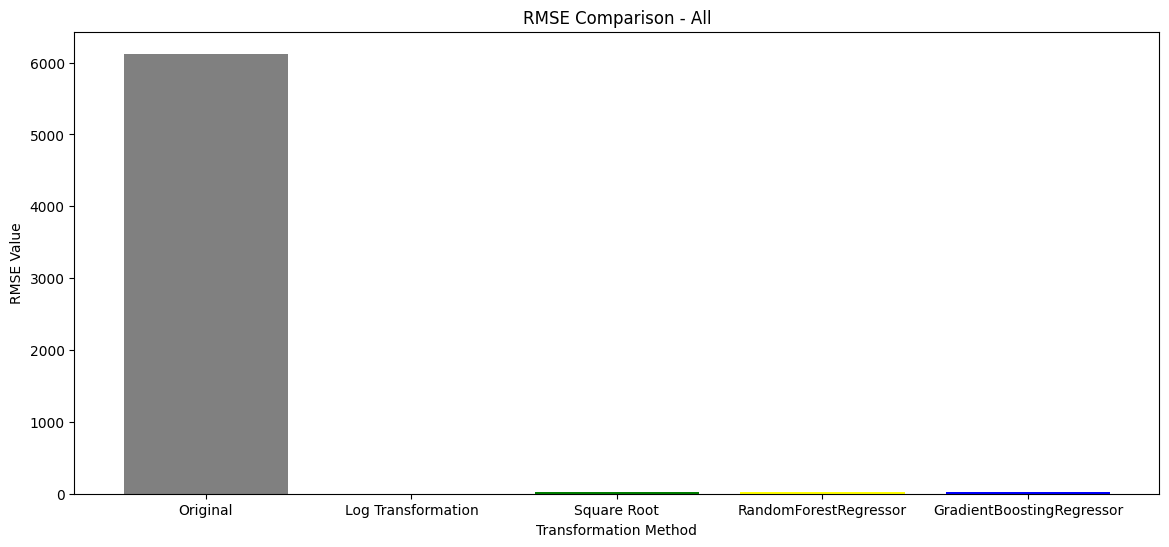

In [53]:
# Define RMSE values (replace with actual values)
# rmse_original_all = 6123.717820331538
# rmse_log_all = 0.5781142626140165
# rmse_sqrt_all = 27.47460760599568

# Labels for the RMSE values
labels = ['Original', 'Log Transformation', 'Square Root' , 'RandomForestRegressor', "GradientBoostingRegressor"]

# RMSE values
rmse_values = [rmse_original_all, rmse_log_all, rmse_sqrt_all, rmse_rf, rmse_gb]

# Set the figure size (adjust the width and height as needed)
plt.figure(figsize=(14, 6))  # Adjust width and height as needed

# Create a bar plot
plt.bar(labels, rmse_values, color=['grey', 'orange', 'green', 'yellow', 'blue'])

# Add labels and a title
plt.xlabel('Transformation Method')
plt.ylabel('RMSE Value')
plt.title('RMSE Comparison - All')

# Display the plot
plt.show()


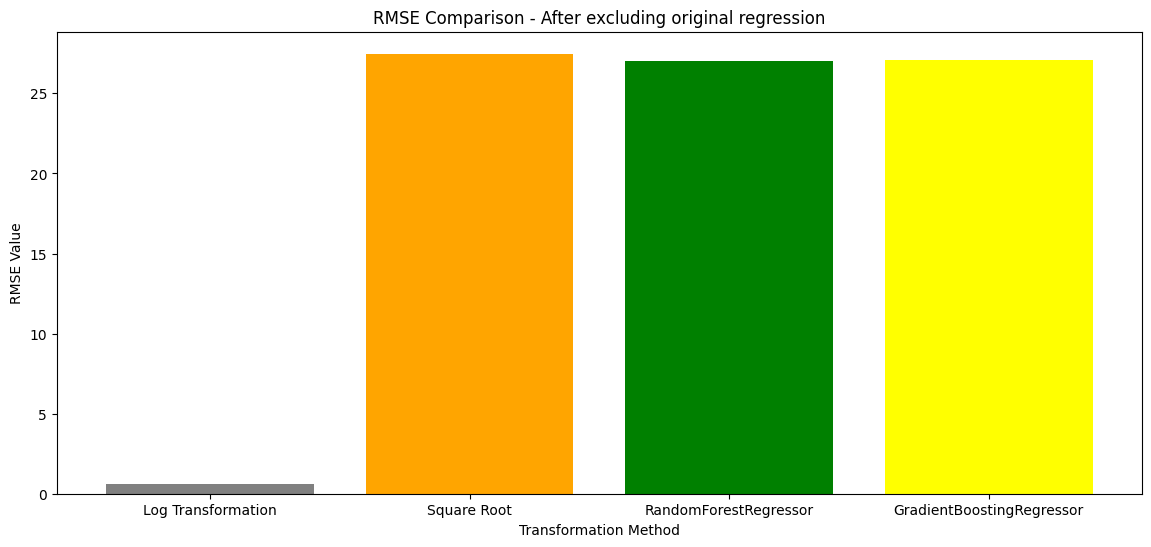

In [54]:
# Labels for the RMSE values
labels = ['Log Transformation', 'Square Root' , 'RandomForestRegressor', "GradientBoostingRegressor"]

# RMSE values
rmse_values = [rmse_log_all, rmse_sqrt_all, rmse_rf, rmse_gb]

# Set the figure size (adjust the width and height as needed)
plt.figure(figsize=(14, 6))  # Adjust width and height as needed

# Create a bar plot
plt.bar(labels, rmse_values, color=['grey', 'orange', 'green', 'yellow', 'blue'])

# Add labels and a title
plt.xlabel('Transformation Method')
plt.ylabel('RMSE Value')
plt.title('RMSE Comparison - After excluding original regression')

# Display the plot
plt.show()


In [55]:
print(rmse_log_all)
print(rmse_sqrt_all)
print(rmse_rf)
print(rmse_gb)

0.5781142626140165
27.47460760599568
27.0385560345827
27.07845050366416


### 3.2 Conclusion

**Executive summary**


The dataset, derived from IBM Marketing Data, aims to predict customer value using regression and machine learning models. The main objective is to predict customer behaviors to bolster retention. Comprehensive analysis of the customer data aids in tailoring retention programs based on specific demographics and purchasing habits. Moreover, predictive analytics were employed to deeply understand the interactions of the most profitable customers. Specific strategic actions were then initiated to enhance the engagement and growth of these profitable customers.

During the preprocessing and exploratory data analysis phase, the dataset was found to be complete with no missing values. Our modeling strategy encompassed three types of linear regression models: one with the original customer value, another with a log-transformed customer value, and the third with a square-root transformed customer value. Additionally, Random Forest and Gradient Boosting models were employed for predictions.

In terms of model evaluation, the RMSE was the primary metric of performance. While the log-transformed and square-root transformed models exhibited a lower RMSE, they were discarded due to violations of key modeling assumptions. Ultimately, the Random Forest model, displaying the lowest RMSE without any assumption breaches, was selected as the final model.


<BR>

- Modeling strategy included three linear regression models: original customer value, log-transformed value, and square-root transformed value.
- Random Forest and Gradient Boosting models were also used for predictions.
- RMSE was the key performance metric for model evaluation.
- While log-transformed and square-root transformed models had lower RMSE, they were rejected due to assumption violations.
- The Random Forest model was chosen as the final model due to its low RMSE and adherence to assumptions.